## Simulating random signals

using Poisson, Gaussian and Uniform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from scipy.ndimage import uniform_filter1d
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [2]:
# @title Data retrieval
# this retrieves the dataset if not already in the folder

import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


# Todos
## get plausible lambda for Poisson

- exclude 0s, then fit poissons to bin rate
- $\lambda = mean$

## get plausible lambda for Exponential

- exclude 0s, then fit exponentials to bin rate
- $\lambda = \frac{1}{mean}$

## get plausible Normal parameters

- doing the same with mean and std

## get plausible number of 0s

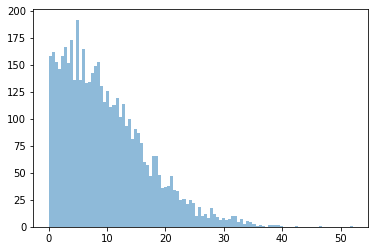

In [11]:
plt.hist(dat['sresp'][0][dat['sresp'][0] > 0], bins = 100, alpha = .5) # histogram without zeros
plt.show()

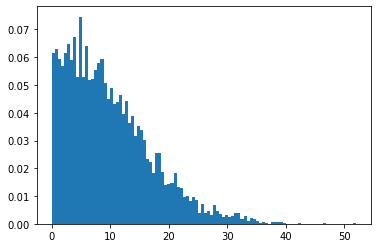

In [6]:
# dat_clean contains data from one neuron without 0s
dat_clean = dat['sresp'][0][dat['sresp'][0] > 0]
#bins = np.arange(50) - 0.5

plt.hist(dat_clean, bins=100, density=True, label='Data')
plt.show()

In [8]:
mean = dat_clean.mean()

In [9]:
# simualte one synthetic neuron
rate = 10
neuron = np.random.exponential(1/mean, 7018)
#neuron = np.random.poisson(mean, 7018)

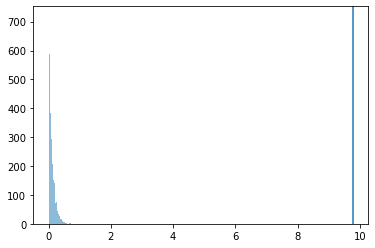

In [11]:
plt.hist(neuron, bins = 100, alpha = .5)
#plt.hist(dat_clean, bins = 100, alpha = .5)

plt.axvline(mean)
plt.show()

# misc

In [ ]:
# syntax for instantiating normal and poisson
# add another parameter for size
np.random.normal(mean, std)
np.random.poisson(rate)
np.random.exponential(rate)

In [ ]:
## potential poisson-fitting code
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(50) - 0.5
entries, bin_edges, patches = plt.hist(dat_clean, bins=bins, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)